# Time Series Data Analysis on Agriculture Production In the USA

Agricultural production is a key part of the U.S. economy. With a growing population, understanding and forecasting food output is essential for planning and sustainability.

This analysis aims to model agricultural production over time and build a forecasting model using time series techniques.

Main steps include:

1.   Graphical analysis
2.   Model the structure of the time series
3.   Estimating the model parameters
4.   Diagnostic testing to evaluate the fitted model

*We begin by loading the data and exploring it through basic visualizations.*

In [ ]:
 #using python
#from google.colab import drive
#drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#library(readxl)

data <- read_excel("/content/drive/MyDrive/time series project/Agriculture production USA.xlsx", col_names = FALSE)
head(data)
colnames(data) <- c("date", "production")
head(data)


New names:
• `` -> `...1`
• `` -> `...2`


...1,...2
<dttm>,<dbl>
1992-01-01,26881
1992-02-01,29347
1992-03-01,30104
1992-04-01,29146
1992-05-01,30165
1992-06-01,29975


date,production
<dttm>,<dbl>
1992-01-01,26881
1992-02-01,29347
1992-03-01,30104
1992-04-01,29146
1992-05-01,30165
1992-06-01,29975


The data contains monthly agricultural production data in the USA from January 1992 to December 2017.

It consists of two columns: date and production, with a total of 312 rows (26 years × 12 months).

The data is clean, no missing values were detected.

Now, let's construct our indexed time series.

In [ ]:
data.ts <- ts(data$production, start= c(1992,1), freq=12)

# Graphical analysis
To understand the time series data effectively we use a graph.

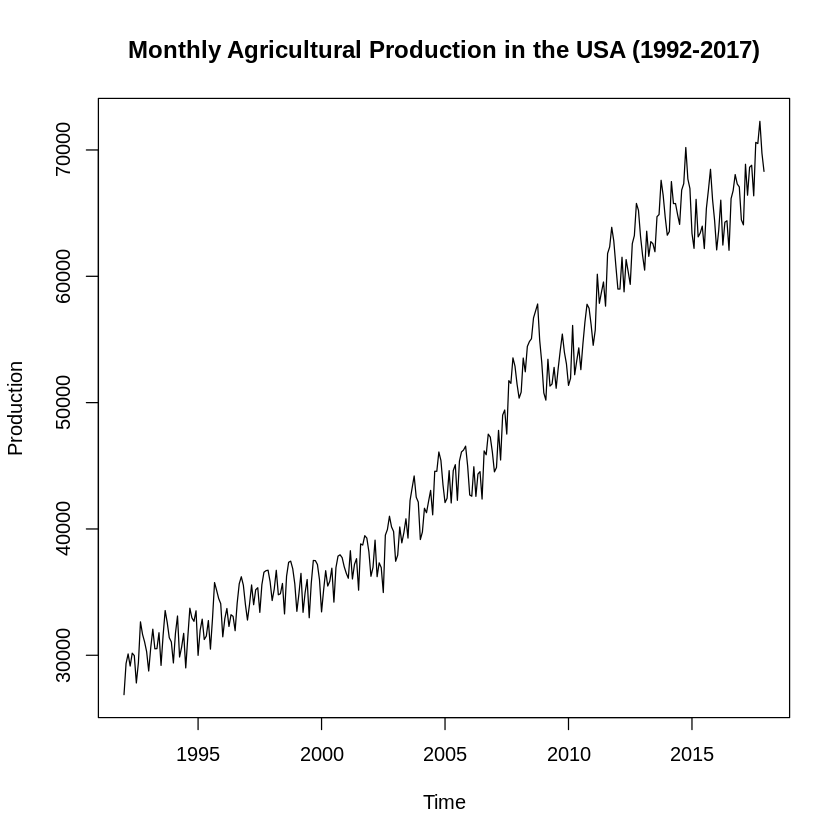

In [ ]:
plot(data.ts, main = "Monthly Agricultural Production in the USA (1992-2017)", ylab="Production")

The plot reveals a trend in agricultural production, with potential increases over time.

It also shows repeating seasonality, with peaks occurring at regular intervals.

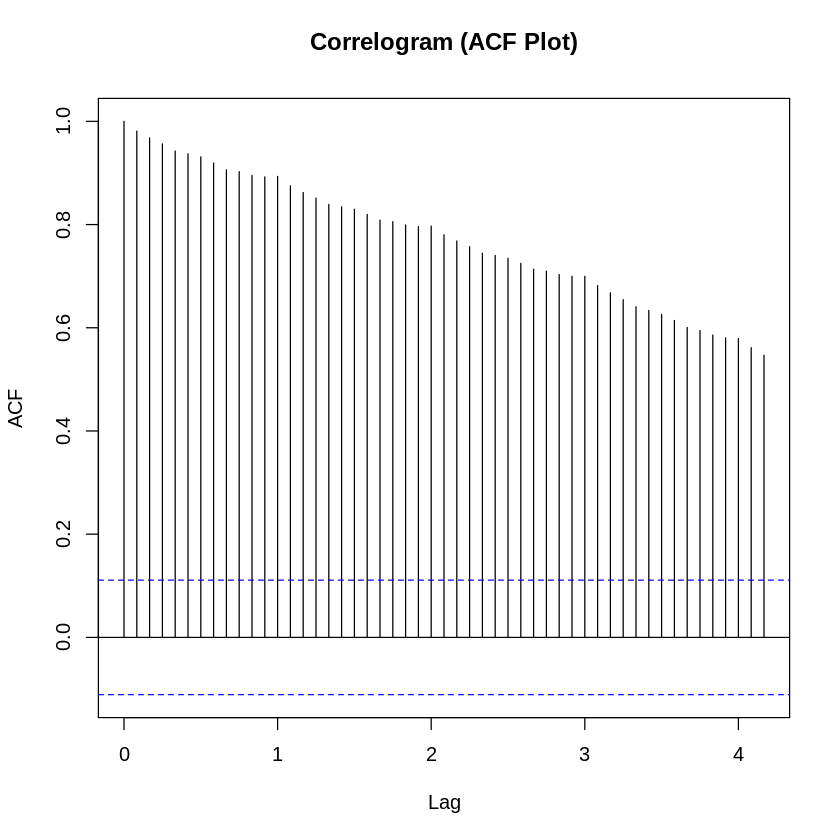

In [ ]:
acf(data.ts, main = "Correlogram (ACF Plot)", 50)

The ACF curve shows a slow decay, indicating indeed the presence of a trend in the data.

Additionally, we can observe seasonality, repeating cycles with periodicity = 12 months.

*We will perform both additive and multiplicative decompositions of the time series and evaluate the residuals of each model to determine which type best fits the data for future forecasting.*

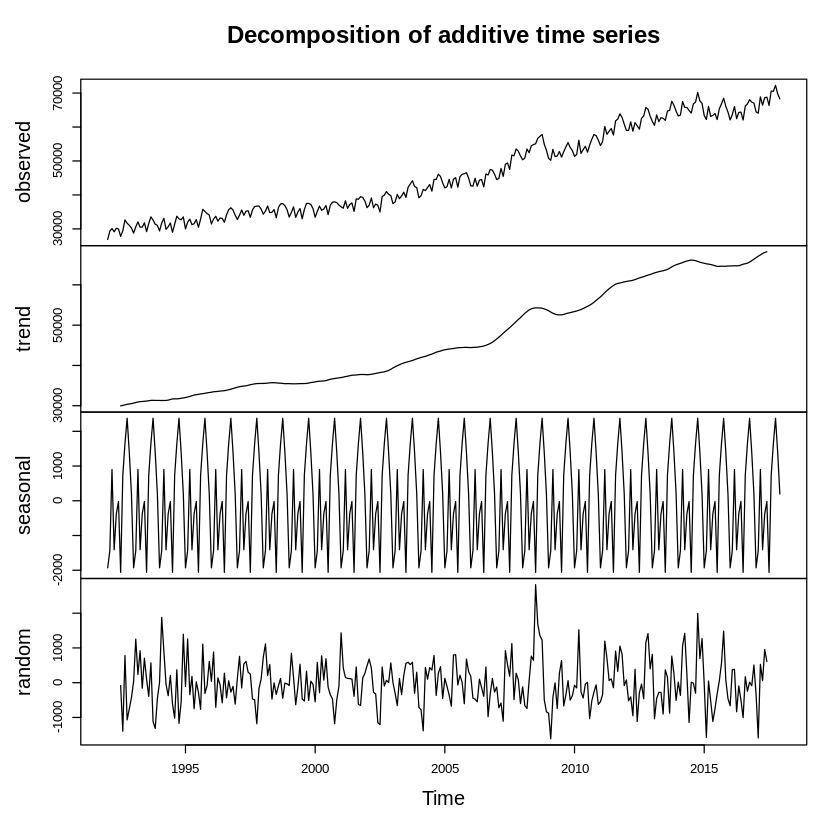

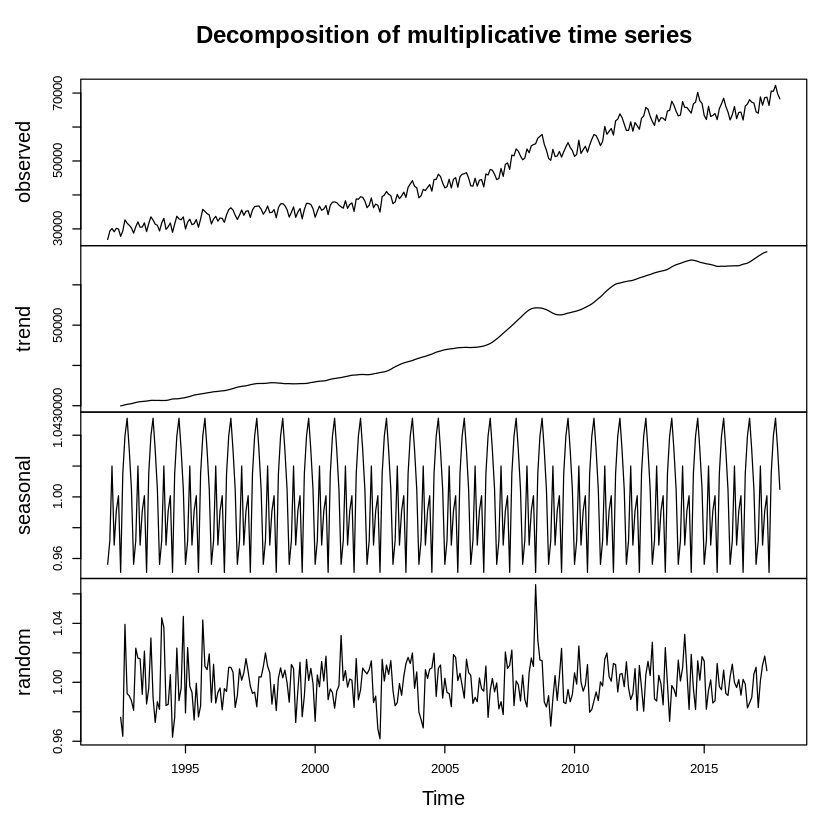

In [ ]:
decomp_add <- decompose(data.ts, type = "additive")
plot(decomp_add)

decomp_mult <- decompose(data.ts, type = "multiplicative")
plot(decomp_mult)

Both the additive and multiplicative models appear to have similar decomposition components, with no significant differences observed. Therefore, we will proceed with modeling the time series using the additive model.

# Adjustment of deterministic component of the time series
We will now identify the best model to capture the trend and seasonality.

1.   **Model the trend:**
We will construct both linear and quadratic models using linear regression with least squares estimation, and compare them to determine which one better captures the trend.

*Remark: Fisrt, we will standardize the time variable to ensure that the model focuses on the underlying patterns in the data rather than the scale of the time variable.*

In [ ]:
tps <- 1:length(data.ts)

ntps <- (tps - mean(tps)) / sd(tps)

* **Linear model**: Yₜ = a × t + b + εₜ

In [ ]:
l1 <- lm(data.ts ~ ntps)

We use display detailed information about the linear regression model of the trend.

In [ ]:
summary(l1)


Call:
lm(formula = data.ts ~ ntps)

Residuals:
    Min      1Q  Median      3Q     Max 
-7484.9 -2337.0   103.1  2210.5  7488.0 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  46516.7      173.7  267.74   <2e-16 ***
ntps         12430.1      174.0   71.43   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3069 on 310 degrees of freedom
Multiple R-squared:  0.9427,	Adjusted R-squared:  0.9425 
F-statistic:  5102 on 1 and 310 DF,  p-value: < 2.2e-16


The linear model has a high R-squared value of 0.9427, indicating that approximately 94% of the variability in production is explained by the trend.

The p-values for the coefficients are < 0.05, indicating that all coefficients are statistically significant.

The F-statistic also yields a p-value < 0.05, confirming that the model is globally significant.

Overall, the model provides a good fit to the data.

* **Quadratic model**: Yₜ = c × t² + a × t + b + εₜ

In [ ]:
l2 <- lm(data.ts ~ ntps + I(ntps^2))

We display detailed information about the linear regression model using a second-degree polynomial to capture the trend.

In [ ]:
summary(l2)


Call:
lm(formula = data.ts ~ ntps + I(ntps^2))

Residuals:
    Min      1Q  Median      3Q     Max 
-6450.3 -1564.6   -40.7  1506.6  6609.8 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  44384.6      204.1  217.47   <2e-16 ***
ntps         12430.1      136.3   91.21   <2e-16 ***
I(ntps^2)     2139.0      152.6   14.02   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2403 on 309 degrees of freedom
Multiple R-squared:  0.965,	Adjusted R-squared:  0.9648 
F-statistic:  4258 on 2 and 309 DF,  p-value: < 2.2e-16


The linear model has a high R-squared value of 0.965, indicating that approximately 96% of the variability in production is explained by the trend.

The p-values for the coefficients are < 0.05, indicating that all coefficients are statistically significant.

The F-statistic also yields a p-value < 0.05, confirming that the model is globally significant.

Overall, this model also provides a good fit to the data.



Let's plot both trends: the red line represents the linear model, while the blue line represents the quadratic model.

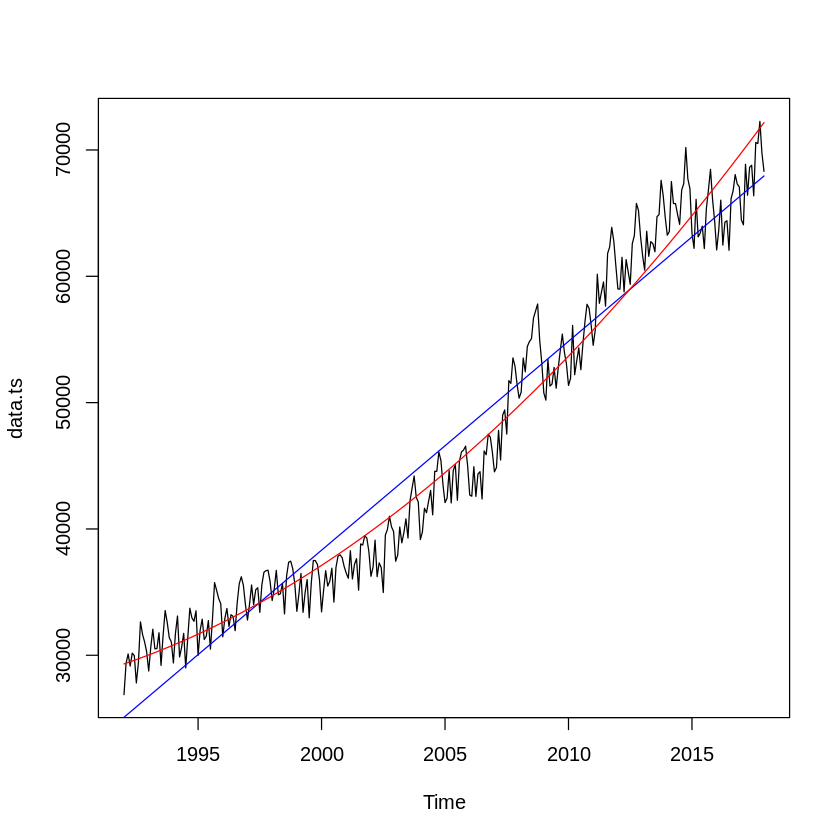

In [ ]:
plot(data.ts)
points(time(data.ts), fitted(l1), type="l", col="blue")
points(time(data.ts), fitted(l2), type="l", col="red")

*Since both models are good, we will choose the one with the highest R-squared, which corresponds to the quadratic model for trend modeling.*

Next, we will analyze the correlation of the residuals to assess the quality of the model.

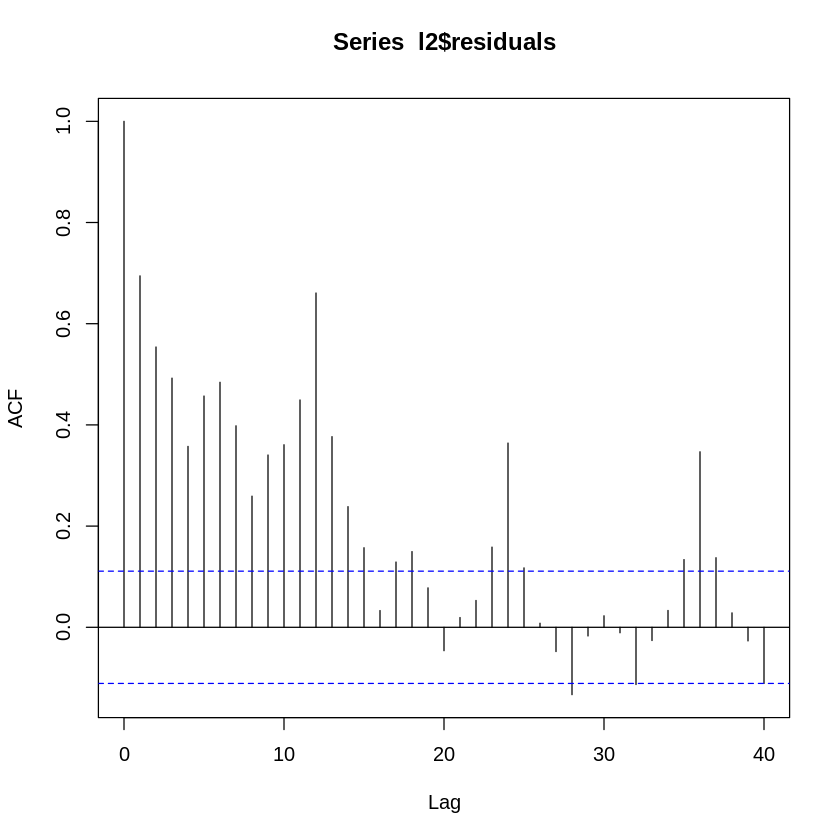

In [ ]:
acf(l2$residuals, 40)

The correlogram of the residuals shows a fast decay of autocorrelations, indicating that the trend has been effectively removed from the data.

The model appears to have captured the trend, leaving only the seasonal component with periodicity = 12.

2.   **Model the seasonality:**
We will use harmonic functions by adding sine and cosine components to the model, accounting for periodic patterns that repeat at regular intervals.

In [ ]:
MC <- matrix(0, length(data.ts), 6)
MS <- matrix(0, length(data.ts), 6)
for(i in 1:6) MC[,i] <- cos(2*pi*tps/ (12/i))
for(i in 1:6) MS[,i] <- sin(2*pi*tps/ (12/i))

In [ ]:
l3 <- lm(data.ts ~ ntps + I(ntps^2) + MC + MS)
summary(l3)


Call:
lm(formula = data.ts ~ ntps + I(ntps^2) + MC + MS)

Residuals:
    Min      1Q  Median      3Q     Max 
-4351.1 -1460.5  -125.6  1300.3  6526.9 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.438e+04  1.695e+02 261.795  < 2e-16 ***
ntps         1.240e+04  1.133e+02 109.427  < 2e-16 ***
I(ntps^2)    2.140e+03  1.268e+02  16.883  < 2e-16 ***
MC1          4.091e+02  1.599e+02   2.559 0.010993 *  
MC2         -6.904e+02  1.599e+02  -4.317 2.16e-05 ***
MC3         -2.478e+02  1.599e+02  -1.550 0.122278    
MC4          6.506e+02  1.599e+02   4.069 6.05e-05 ***
MC5         -1.076e+02  1.598e+02  -0.673 0.501563    
MC6          1.445e+02  1.405e+02   1.029 0.304500    
MS1         -1.084e+03  1.599e+02  -6.778 6.57e-11 ***
MS2         -9.464e+02  1.599e+02  -5.920 8.86e-09 ***
MS3         -1.374e+02  1.601e+02  -0.858 0.391394    
MS4         -4.851e+02  1.599e+02  -3.035 0.002619 ** 
MS5          5.941e+02  1.602e+02   3.709 0.000249 ***
MS6     

When we display the information of the new model, we observe that the p-values of the coefficients MC3, MC5, MC6, MS3, and MS6 are > 0.05, indicating that they are not significant.

Therefore, we will exclude these terms from the model.

In [ ]:
l4 <- lm(data.ts ~ ntps + I(ntps^2) + MC[ , -c(3, 5, 6)]+ MS[ , -c(3, 6)])
summary(l4)


Call:
lm(formula = data.ts ~ ntps + I(ntps^2) + MC[, -c(3, 5, 6)] + 
    MS[, -c(3, 6)])

Residuals:
    Min      1Q  Median      3Q     Max 
-4375.8 -1519.9   -69.7  1247.9  6381.9 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)         44384.4      169.4 261.939  < 2e-16 ***
ntps                12395.9      113.2 109.490  < 2e-16 ***
I(ntps^2)            2139.1      126.7  16.883  < 2e-16 ***
MC[, -c(3, 5, 6)]1    406.8      159.8   2.546 0.011390 *  
MC[, -c(3, 5, 6)]2   -694.6      159.8  -4.348 1.88e-05 ***
MC[, -c(3, 5, 6)]3    648.6      159.8   4.060 6.26e-05 ***
MS[, -c(3, 6)]1     -1083.7      159.8  -6.781 6.30e-11 ***
MS[, -c(3, 6)]2      -946.8      159.8  -5.926 8.45e-09 ***
MS[, -c(3, 6)]3      -483.7      159.8  -3.028 0.002674 ** 
MS[, -c(3, 6)]4       602.3      159.8   3.770 0.000196 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1995 on 302 degrees of freedom
Multiple R-square

The model that adjusts for both trend and seasonality has a high R-squared value of 0.9764, indicating that approximately 97% of the variability in production is explained by the trend.

The p-values for the coefficients are < 0.05, indicating that all coefficients are statistically significant.

The F-statistic also yields a p-value < 0.05, confirming that the model is globally significant.

Overall, the model provides a good fit to the data.

*Let's visualize the fitted model in blue alongside the original data.*

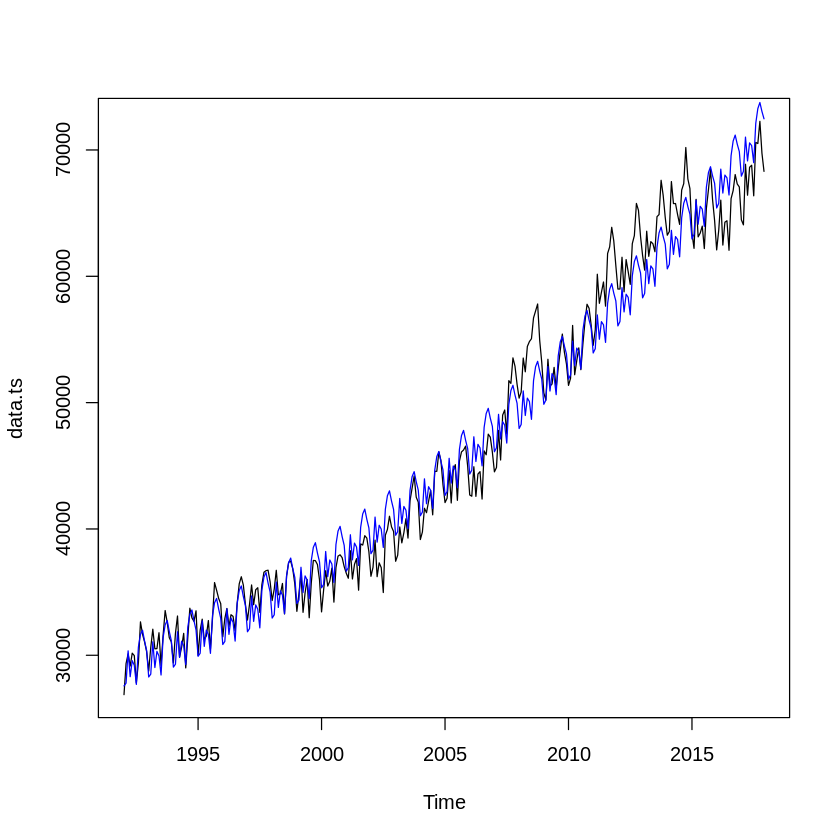

In [ ]:
plot(data.ts)
points(time(data.ts), fitted(l4), type = "l", col="blue")

# Test of stationnarity and interpretation


Next, we will analyze the correlation of the residuals to assess the quality of the new model.

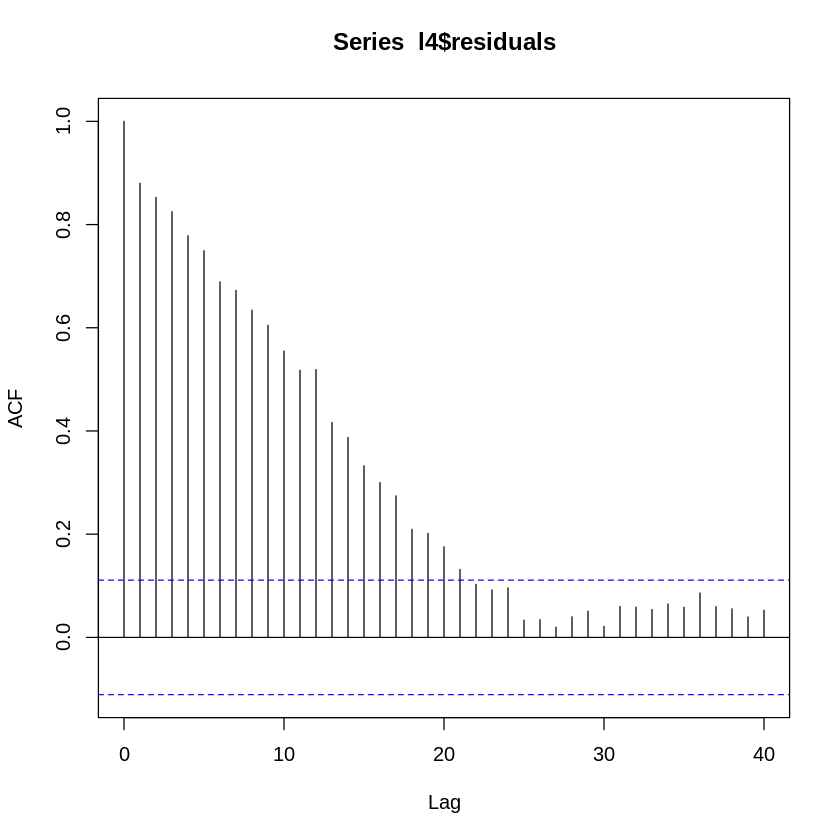

In [ ]:
acf(l4$residuals, 40)

Based on the correlogram of the residuals, there are autocorrelations and information left in the residulas that we need to extract.

So now let's do a stationary test using Augmented Dickey-Fuller to know if whether we can use ARIMA model.

In [ ]:
#install.packages("tseries")
#library(tseries)
adf.test(l4$residuals)


	Augmented Dickey-Fuller Test

data:  l4$residuals
Dickey-Fuller = -2.1278, Lag order = 6, p-value = 0.5225
alternative hypothesis: stationary


The test gave us p_value > 0.05 so we accept H0: the residuals are not stationary.

We need to difference the residuals to be able to use ARIMA model later.


In [ ]:
diff_res <- diff(l4$residuals)
adf.test(diff_res)

Warning message in adf.test(diff_res):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  diff_res
Dickey-Fuller = -7.1561, Lag order = 6, p-value = 0.01
alternative hypothesis: stationary


Now test gave us p_value < 0.05 so we accept H1: the residuals are stationary.

*We can use the ARIMA model on the residuals to capture the information inside it.*

# Construction of the Arima Model

We will determine the parameters 𝑝,𝑞, and 𝑑 of the ARIMA model by analyzing the ACF and PACF plots.

Since we have already applied first differencing to the series, we set 𝑑=1.

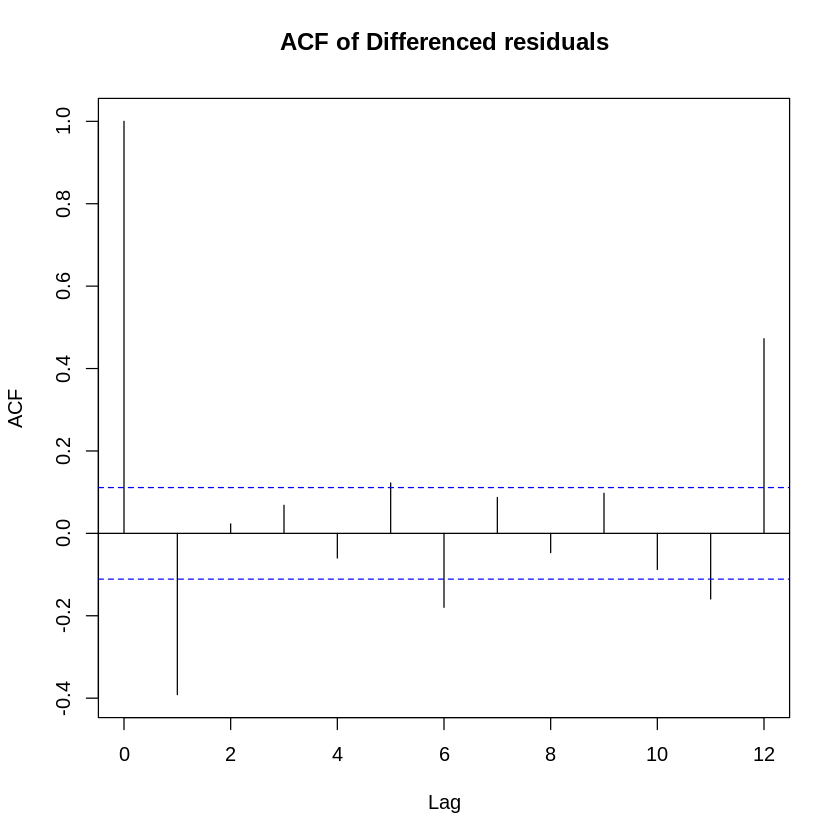

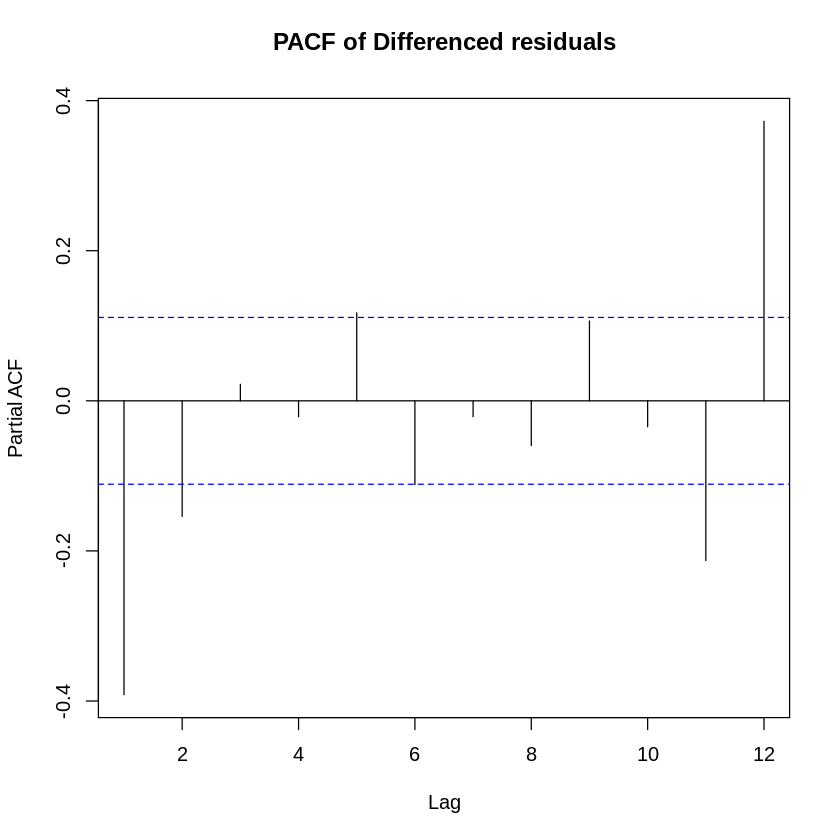

In [ ]:
acf(diff_res, main="ACF of Differenced residuals", 12)
pacf(diff_res, main="PACF of Differenced residuals", 12)

To identify the appropriate values for the ARIMA model parameters
𝑝 (autoregressive order) and 𝑞 (moving average order), we analyzed the Partial Autocorrelation Function (PACF) and Autocorrelation Function (ACF) plots and got 𝑝=5 and 𝑞=4.

In [ ]:
arima_model <- arima(diff_res, order = c(5, 1, 4))

Now, let's evaluate the residual diagnostics of the fitted ARIMA model.
It will allow us to check whether the residuals resemble white noise, indicating a good model fit.

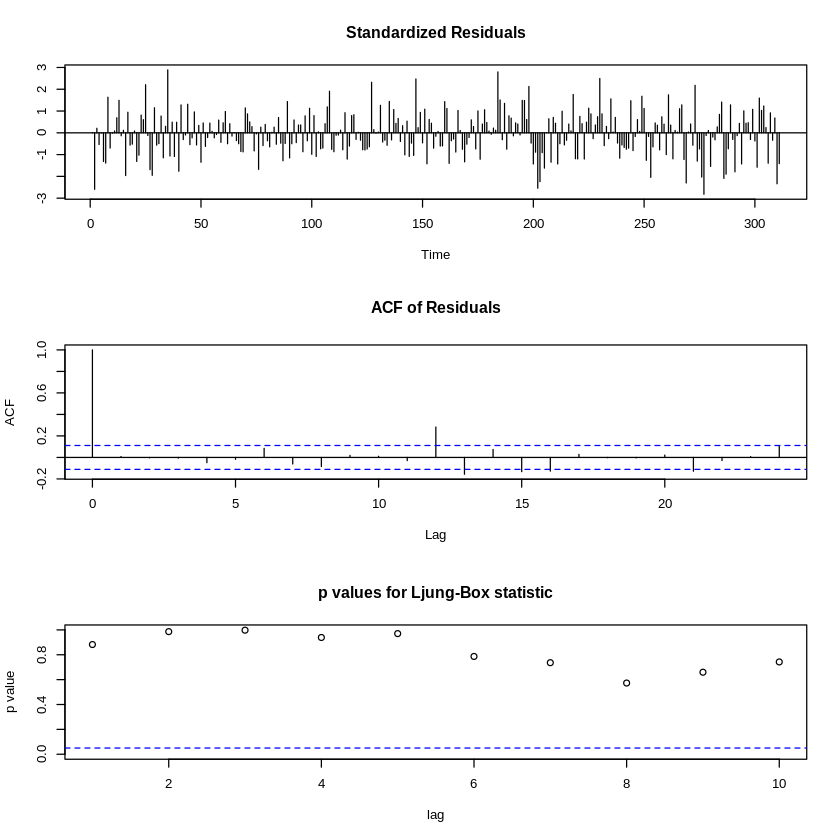

In [ ]:
tsdiag(arima_model)

From the tsdiag plots, the residuals show no significant autocorrelation and the standardized residuals are random, then our ARIMA model has adequately captured the information left in the residuals.

# Conclusion

By combining the additive model for trend and seasonality (model l4) with the ARIMA model for the residuals, we are able to capture both the underlying trend/seasonal patterns and the random fluctuations in the data.

This combined model provides a more accurate and comprehensive explanation of the time series, allowing us to make more reliable forecasts for future values.